# HOMEWORK 2

#### Arish Balasubramaniam CIN : 304455611
#### Ishankumar Patel            CIN : 305096160
#### Cheryl Maria Jose          CIN : 305052753

In [1]:
# Importing libraries and packages:

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl

In [2]:
from sklearn import preprocessing

In [3]:
 %matplotlib inline

In [6]:
img = mpimg.imread("/Users/cherylmariajose/Downloads/HW2/Digit/1.jpg")
img


array([[  0,   0,  11, 187, 210,  78,   5,   0],
       [ 13,   5,   0, 181, 252, 136,   0,   2],
       [  0,   1,  56, 232, 255, 104,   5,   3],
       [  0, 118, 244, 240, 255,  11,   8,   0],
       [ 18,   0,  11, 255, 242,  57,  12,   0],
       [  0,   3,  12, 248, 255,  77,   5,   0],
       [  9,   2,  21, 255, 255, 114,   0,   0],
       [  0,   0,   0, 172, 251, 157,   0,  12]], dtype=uint8)

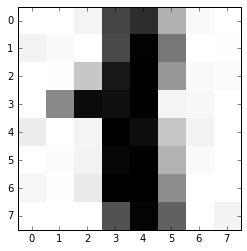

In [7]:
plt.imshow(img, cmap ='gray_r', interpolation = 'nearest')

In [8]:
df = pd.DataFrame()
df = pd.read_csv('/Users/cherylmariajose/Downloads/HW2/label.csv')

In [9]:
y = df['digit']
# checking the label vector by printing every 10 values
y

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Name: digit, dtype: int64

In [137]:
%matplotlib inline

n_features = 64   # 8x8 image

# Feature Table:
X = pd.DataFrame(columns = ['F'+str(j) for j in range(n_features)])

for i in range(1797):
    file_name = str(i) + '.jpg'
    file_path = '/Users/cherylmariajose/Downloads/HW2/Digit/'
    img = mpimg.imread(file_path + file_name)
    #print(img,'\n')
    #imgplot = plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
    
    img_vector = img.reshape((1,n_features))
    #print(img_vector[0],'\n')
    
    X.loc[i,:] = img_vector[0]

print(X.head())


# Label Vector:
#y = []

#label = pd.read_csv(file_path + 'label.csv')
#y = label['digit']
#print(y.head())    
    


    F0   F1     F2     F3     F4     F5    F6   F7    F8     F9  ...     F54  \
0  0.0  2.0   88.0  217.0  158.0   21.0   0.0  0.0  16.0    0.0  ...     4.0   
1  0.0  0.0   11.0  187.0  210.0   78.0   5.0  0.0  13.0    5.0  ...     0.0   
2  0.0  0.0    5.0   59.0  240.0  199.0   2.0  0.0   5.0    0.0  ...    92.0   
3  6.0  0.0  108.0  255.0  213.0   13.0  10.0  0.0   2.0  131.0  ...   168.0   
4  0.0  6.0    0.0   34.0  160.0    7.0   7.0  0.0   5.0    0.0  ...     7.0   

   F55  F56   F57    F58    F59    F60    F61    F62   F63  
0  0.0  4.0   3.0   87.0  228.0  182.0    0.0    9.0   2.0  
1  0.0  0.0   0.0    0.0  172.0  251.0  157.0    0.0  12.0  
2  0.0  0.0  11.0    0.0   54.0  173.0  255.0  138.0   0.0  
3  1.0  0.0   0.0  118.0  217.0  226.0  159.0    0.0   3.0  
4  0.0  0.0   0.0    2.0   42.0  250.0   51.0    0.0   4.0  

[5 rows x 64 columns]


In [123]:
X

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63
0,0.0,2.0,88.0,217.0,158.0,21.0,0.0,0.0,16.0,0.0,...,4.0,0.0,4.0,3.0,87.0,228.0,182.0,0.0,9.0,2.0
1,0.0,0.0,11.0,187.0,210.0,78.0,5.0,0.0,13.0,5.0,...,0.0,0.0,0.0,0.0,0.0,172.0,251.0,157.0,0.0,12.0
2,0.0,0.0,5.0,59.0,240.0,199.0,2.0,0.0,5.0,0.0,...,92.0,0.0,0.0,11.0,0.0,54.0,173.0,255.0,138.0,0.0
3,6.0,0.0,108.0,255.0,213.0,13.0,10.0,0.0,2.0,131.0,...,168.0,1.0,0.0,0.0,118.0,217.0,226.0,159.0,0.0,3.0
4,0.0,6.0,0.0,34.0,160.0,7.0,7.0,0.0,5.0,0.0,...,7.0,0.0,0.0,0.0,2.0,42.0,250.0,51.0,0.0,4.0
5,15.0,0.0,200.0,149.0,2.0,0.0,13.0,0.0,0.0,11.0,...,69.0,0.0,7.0,0.0,143.0,255.0,255.0,150.0,7.0,0.0
6,0.0,13.0,0.0,192.0,210.0,0.0,10.0,0.0,8.0,0.0,...,134.0,3.0,0.0,0.0,11.0,145.0,248.0,174.0,46.0,0.0
7,10.0,0.0,114.0,133.0,203.0,255.0,235.0,16.0,0.0,13.0,...,0.0,0.0,1.0,0.0,225.0,66.0,11.0,0.0,0.0,11.0
8,0.0,7.0,145.0,223.0,128.0,13.0,0.0,2.0,0.0,0.0,...,133.0,0.0,0.0,3.0,169.0,249.0,245.0,163.0,26.0,1.0
9,0.0,0.0,174.0,199.0,5.0,0.0,0.0,8.0,10.0,23.0,...,90.0,1.0,0.0,3.0,145.0,182.0,217.0,55.0,0.0,2.0


In [124]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=2)

In [125]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(1617, 64)
(1617,)


In [126]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(180, 64)
(180,)


In [127]:
# print the the testing set:
print(X_test)
print('\n')
print(y_test)

        F0    F1     F2     F3     F4     F5     F6    F7    F8     F9  ...    \
154    0.0   0.0    6.0   49.0  255.0   45.0    0.0   5.0   4.0    2.0  ...     
564    0.0  14.0    8.0  251.0  167.0    5.0   16.0   0.0  15.0    0.0  ...     
1444   1.0   3.0  127.0  209.0  229.0   63.0    2.0   7.0   0.0   87.0  ...     
1394   0.0   2.0   31.0  255.0  200.0   10.0    0.0   0.0  12.0    0.0  ...     
1660   3.0   0.0  167.0  122.0    0.0   19.0    0.0   6.0   0.0   77.0  ...     
1368   0.0  18.0  192.0  255.0  255.0  232.0    2.0   0.0   1.0  109.0  ...     
1436   0.0   6.0    0.0    0.0  179.0  232.0   32.0   0.0  14.0    0.0  ...     
1420   5.0  10.0  196.0  182.0  192.0  231.0   95.0   0.0   0.0    0.0  ...     
1334   5.0   0.0   12.0  216.0  178.0   13.0    0.0   0.0   1.0    6.0  ...     
581    4.0   0.0   13.0  158.0  250.0  102.0    0.0  10.0   0.0    0.0  ...     
1449   0.0  14.0    0.0  138.0  245.0   16.0    0.0   5.0  16.0    0.0  ...     
240    0.0   9.0  107.0  241

In [128]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 1 Hidden Layer with 80 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

In [129]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [130]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-0.0348157 ,  0.07977119, -0.12074495, ..., -0.09090675,
         0.09028151,  0.07943485],
       [ 0.07405217, -0.01513991,  0.06914368, ..., -0.05215436,
         0.13449872, -0.06672491],
       [-0.07960934,  0.00333349,  0.06276766, ..., -0.04040669,
         0.01057013, -0.00172337],
       ..., 
       [-0.11601656,  0.03203362, -0.11071389, ...,  0.17799743,
         0.11271954,  0.06175977],
       [-0.06381623, -0.06681921, -0.01566723, ...,  0.05428352,
         0.04675409,  0.08338199],
       [-0.07926475,  0.02613946, -0.02031291, ...,  0.15546039,
         0.0788561 ,  0.0989033 ]]), array([[  6.64272383e-02,  -2.27740530e-02,  -4.75108918e-02,
          1.30146934e-02,  -5.23895031e-02,  -1.15674906e-01,
         -7.99953992e-02,  -7.45458580e-02,   1.20128743e-01,
          5.73743861e-02],
       [  4.78058722e-02,   2.44637649e-01,  -1.74815146e-01,
          1.51700010e-01,  -5.26220355e-01,   7.76859303e-02,
          2.03297853e-01,  -6.36687076e-01,   2

In [131]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 8 7 8 7 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 9 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 8 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 4 0 4 0 0 9]


In [132]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann)


0.911111111111


In [112]:
cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)
print("Confusion matrix:")
print(cm_ANN)

Confusion matrix:
[[0 1 2 1 0 0 4 2 3 1]
 [3 0 1 2 3 3 1 2 3 4]
 [0 1 2 2 2 0 2 2 3 0]
 [1 3 3 1 0 2 1 4 3 4]
 [1 3 3 4 1 0 1 1 6 1]
 [2 0 4 2 1 2 1 2 1 1]
 [1 1 5 0 0 1 2 4 1 3]
 [3 1 3 1 1 2 1 1 3 2]
 [2 1 2 1 1 2 2 2 2 4]
 [2 1 1 0 1 4 1 1 4 1]]
